## Read .ghg metadata

In [3]:
import preProcessing
import importlib
import time
importlib.reload(preProcessing)
T1 = time.time()

# Need one or more metadata templates if working with .dat files
# template = ['Y:/BBS/TOA5_BBS.FLUX_2023_06_14_1500.metadata']

# pr = preProcessing.read_ALL('BBS',2023,6,reset=1,processes=8,file_type='dat',metadata_template=template)

# for m in range(7,13):
#     pr = preProcessing.read_ALL('BBS',2023,m,processes=8,file_type='dat')

# for m in range(1,4):
#     pr = preProcessing.read_ALL('BBS',2024,m,processes=8,file_type='dat')

y = 2023
m = 6
pr = preProcessing.read_ALL('BB',y,m,reset=1,processes=8,file_type='ghg')


T2 = time.time()

print('\n')
print('Runtime: ',(T2-T1)/60,' minutes')




Runtime:  0.02873475948969523  minutes


In [1]:
import setupEP as eP
import importlib
import time
importlib.reload(eP)

########## Note - incomplete ghg or biomet files can crash program (preprocessing procedures should help prevent that by re-naming incomplete files)

T1 = time.time()
# mR = eP.makeRun('ep_Templates/DefaultSettings.eddypro','BBS',Processes=6,priority = 'high priority')
# mR.runDates(['2023-01-01 00:00','2024-03-31 23:59'])

mR = eP.makeRun('ep_Templates/DefaultSettings.eddypro','BB',Processes=6,priority = 'high priority')
mR.runDates(['2023-06-01 00:00','2023-06-30 23:59'])

T2 = time.time()
print('\n')
print('Runtime: ',(T2-T1)/60)

Splitting into 3 batches due to update metadata
Running EddyPro[████████████████████████████████████████████████████████████] 13/13

Runtime:  58.014186410109204


## Full Runtime

### Reading & Writing all to Y: drive:

1 Month of BB data (20 hz)

**Preprocessing**: 3.91 minutes (8 cores)
**Processing**: 56.92 minutes (6 cores)

Total: **60.83** minutes

### Reading & Preprocessing on Y: drive then writing EddyPro results locally:

1 Month of BB data (20 hz)

**Preprocessing**: 3.91 minutes (8 cores)
**Processing**: 55.74 minutes (6 cores)

Total: **59.65** minutes

### Copying data to C then writing EddyPro results locally:

1 Month of BB data (20 hz)

**Preprocessing**: 6.30 minutes (1 core copy > 8 core preprocessing)

**Processing**: 54.33 minutes (6 cores)

Total: **60.3** minutes

* Paralellizing data copy could shave enought time to get marginal benfit, but doesn't look to matter much

,wind_speed,u*,wind_dir,Ta_1_1_1,H
TIMESTAMP,,,,,


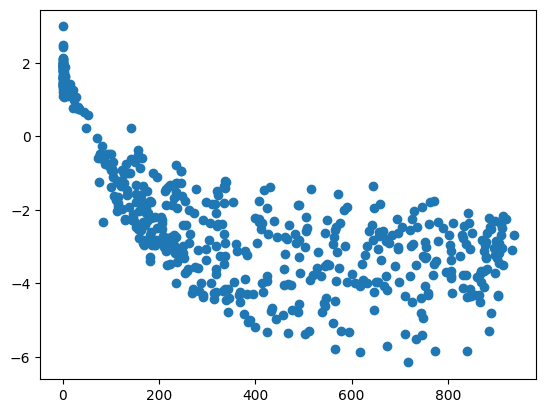

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv(mR.all_outputs['fulloutput'],skiprows=[0,2],na_values=-9999,parse_dates={'TIMESTAMP':['date','time']},index_col='TIMESTAMP')
bm = pd.read_csv(mR.all_outputs['biomet'],skiprows=[1],na_values=-9999,parse_dates={'TIMESTAMP':['date','time']},index_col='TIMESTAMP')

df = pd.concat([df,bm[['RH_1_1_1','Ta_1_1_1','Rg_1_1_1','LWIN_1_1_1']]],axis=1)
df.loc[df['qc_co2_flux']>0,'co2_flux']=np.nan
df.loc[df['u*']<0.15,'co2_flux']=np.nan

plt.scatter(df['Rg_1_1_1'],df['co2_flux'])

df.loc[df['co2_flux']>20,['wind_speed','u*','wind_dir','Ta_1_1_1','H']]


# Speedtests

All times in minutes

### 4 threads (8 timesteps each)

Normal priority: 2.05
High priority: 1.91

### 4 threads (48 timesteps each x 12 days)

High priority: 29

### Eddypro GUI (1 run [12 days, 576 timesteps])

High priority: 90